<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_9_ClusteringAnalysis_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 9: Clutering Analysis
# 21130429 - Phạm Tiến Lộc


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from scipy.stats import mode

#Task 1. For given **dataset1** including features (ID, Gender, Age, Income, Score) related to personal information of customers and their spending score.

#Task 1.1. Load the dataset1 and plot pairwise relationships between features in the dataset

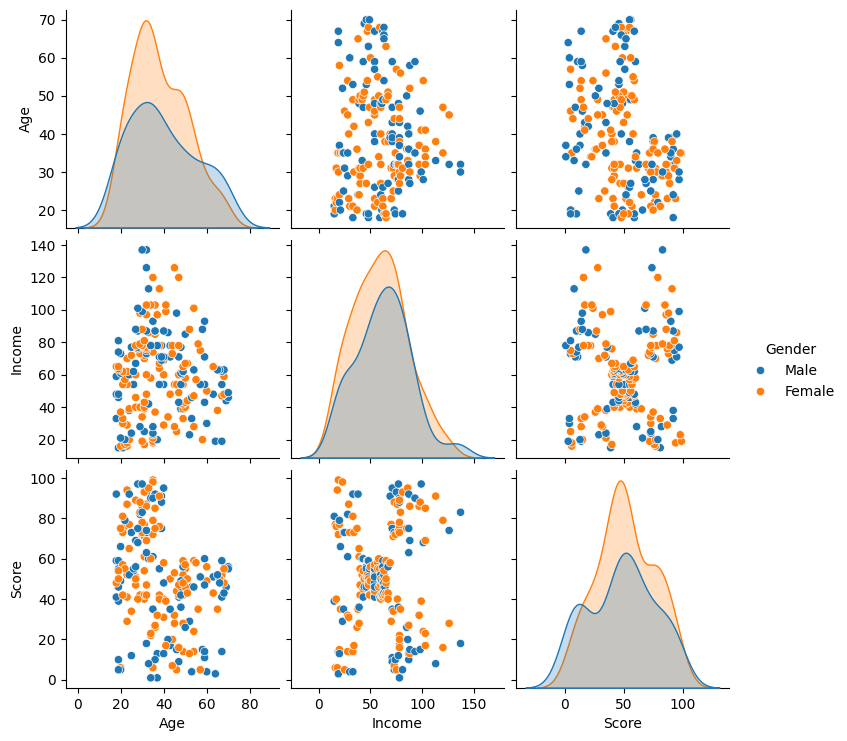

In [10]:
#code
ds1 = pd.read_csv('dataset1.csv')
ds1.drop('ID', axis=1, inplace=True)
sns.pairplot(ds1, hue="Gender")

#Task 1.2. Plot the distribution of numerical features (age, income and score) using histogram in Seaborn or Matplotlib

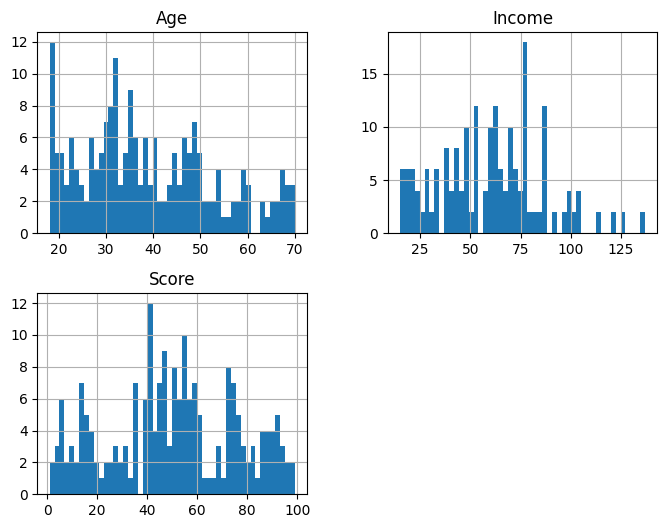

In [16]:
#code
ds1.hist(bins=50, figsize=(8,6))
plt.show()

#Task 1.3. Apply appropriate preprocessing techniques to the dataset in the Task 1.1 (later used for clustering)

In [22]:
#code
encoder = LabelEncoder()
ds1['Gender'] = encoder.fit_transform(ds1['Gender'])
scaler = StandardScaler()
ds1[['Age', 'Income', 'Score']] = scaler.fit_transform(ds1[['Age', 'Income', 'Score']])
ds1

,Gender,Age,Income,Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


#Task 1.4. Apply K-Means algorithm to the dataset obtained in the Task 1.3 with k belonging to the range (3, 10). Then, plot the SSE values for different k values to find the best value of k.

In [32]:
#code
X = ds1[['Age', 'Income', 'Score']]
y = ds1['Gender']
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)
clusters = kmeans.predict(X)
kmeans.cluster_centers_.shape

(3, 3)

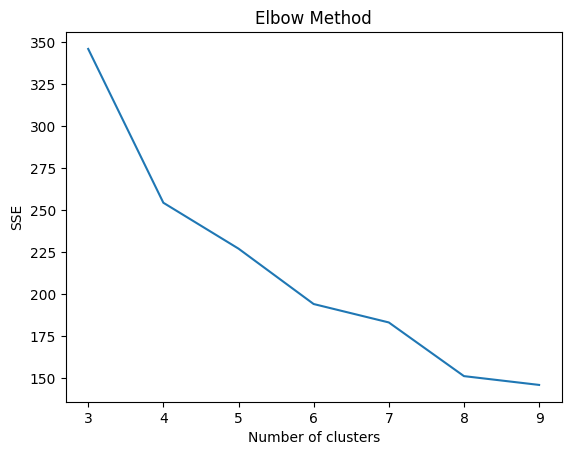

In [27]:
sse = []
for k in range(3, 10):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans. fit(ds1)
 sse. append(kmeans. inertia_)

plt.plot(range(3, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Task 1.5. Assign the Cluster Labels to the dataset1 with labels obtained from the best k value in the Task 1.4

In [39]:
#code
labels = np.zeros_like(clusters)
for i in range(3):
 mask = (clusters == i)
 # print(mask)
 labels[mask] = mode(y)[ 0]
 print(labels[mask])
accuracy_score(y, labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.56

#Task 1.6. Apply describe() method for each cluster to see more details of each cluster

In [40]:
#code
ds1['Cluster'] = labels
ds1.groupby('Cluster').describe()

Gender                            ...     Score                                        
         count  mean       std  min  25%  ...       min       25%       50%       75%       max
Cluster                                   ...                                                  
0        200.0  0.44  0.497633  0.0  0.0  ... -1.910021 -0.599793 -0.007764  0.885132  1.894492

[1 rows x 32 columns]

#Task 2. Compare the performance of K-Means algorithm with other classification algorithms

#Task 2.1. With the dataset2 with attributes: **gender**, **ethnicity**, **education**, **lunch**, **test preparation course**, **math score**, **reading score**, **writing score**. Load the given dataset and display the first 5 rows


In [42]:
#code
ds2 = pd.read_csv('dataset2.csv')
ds2.head(5)

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Task 2.2. display the correlation between the numeric variables - math score, reading score and writing score using pairplot

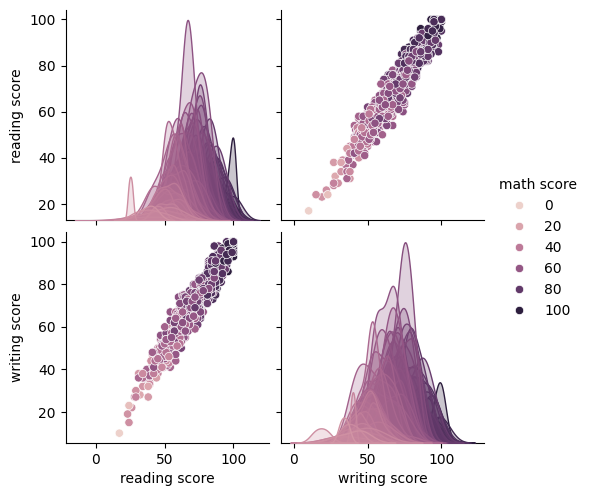

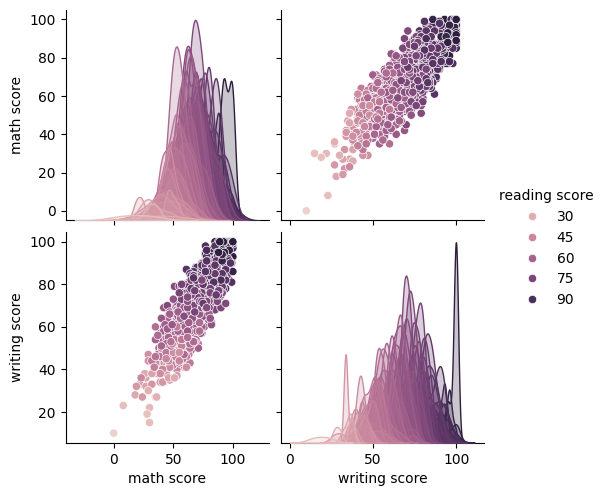

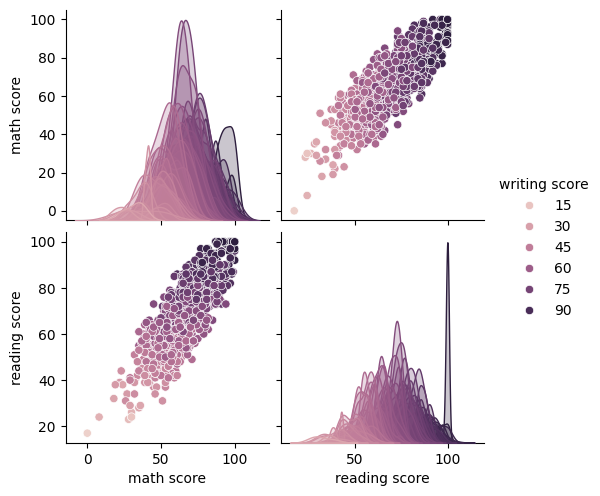

In [43]:
#code
sns.pairplot(ds2, hue="math score")
sns.pairplot(ds2, hue="reading score")
sns.pairplot(ds2, hue="writing score")

#Task 2.3. add columns for grade marks for each exam (math, reading, and writing scores) as follows: >90 = A, >80 = B, >70 = C, >60 = D, >50 = E, <=50 = F

In [62]:
#code
def get_grade(score):
  if score > 90:
    return 'A'
  elif score > 80:
    return 'B'
  elif score > 70:
    return 'C'
  elif score > 60:
    return 'D'
  elif score > 50:
    return 'E'
  else:
    return 'F'

ds2['math grade mark'] = ds2['math score'].apply(get_grade)
ds2['reading grade mark'] = ds2['reading score'].apply(get_grade)
ds2['writing grade mark'] = ds2['writing score'].apply(get_grade)

display(ds2.head())

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score,failed,math grade mark,reading grade mark,writing grade mark
0,0,group B,bachelor's degree,standard,none,72,72,74,0,C,C,C
1,0,group C,some college,standard,completed,69,90,88,0,D,B,B
2,0,group B,master's degree,standard,none,90,95,93,0,B,A,A
3,1,group A,associate's degree,free/reduced,none,47,57,44,1,F,E,F
4,1,group C,some college,standard,none,76,78,75,0,C,C,C


#Task 2.4. Plot histograms for the exam scores and grade marks (generated in the Task 2.3)


<Axes: xlabel='math score', ylabel='Count'>

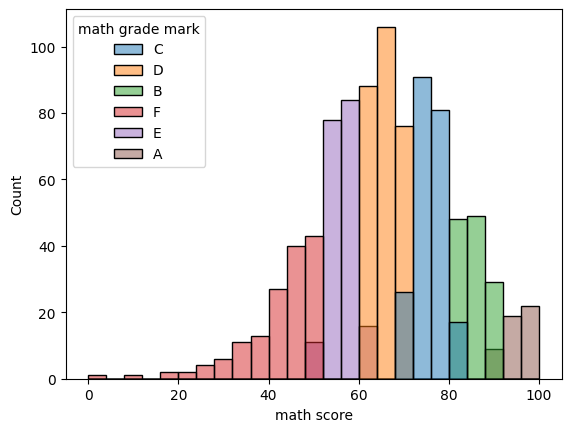

In [51]:
#code
sns.histplot(data=ds2, x="math score", hue="math grade mark")

<Axes: xlabel='reading score', ylabel='Count'>

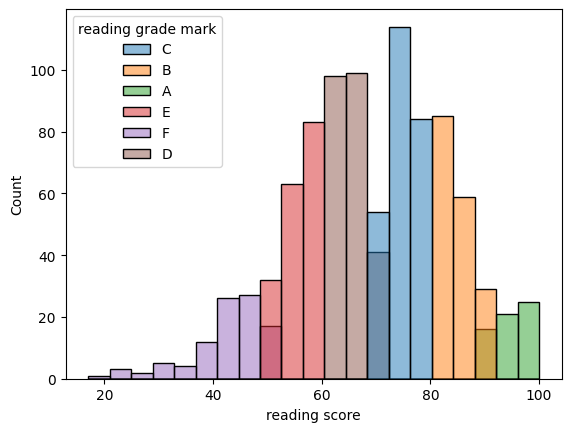

In [52]:
sns.histplot(data=ds2, x="reading score", hue="reading grade mark")

<Axes: xlabel='writing score', ylabel='Count'>

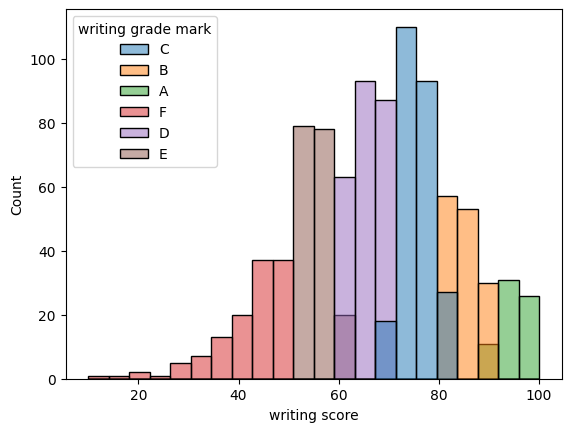

In [53]:
sns.histplot(data=ds2, x="writing score", hue="writing grade mark")

#Task 2.5. Add the class column (named **failed**) to the dataset:

*   **failed = 1** (if student has failed 1 or more exams)
*   **failed = 0** (if student has not failed any exam)

In [55]:
#code
ds2['failed'] = ds2.apply(lambda row: 1 if row['math grade mark'] == 'F' or row['reading grade mark'] == 'F' or row['writing grade mark'] == 'F' else 0, axis=1)
ds2.head()

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score,math grade mark,reading grade mark,writing grade mark,failed
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C,0
1,female,group C,some college,standard,completed,69,90,88,D,B,B,0
2,female,group B,master's degree,standard,none,90,95,93,B,A,A,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,E,F,1
4,male,group C,some college,standard,none,76,78,75,C,C,C,0


#Task 2.6. Apply approriate preprocessing techniques to the dataset obtained in the Task 2.5. for further classification task

In [63]:
#code
ds2.drop(['math grade mark', 'reading grade mark', 'writing grade mark'], axis=1, inplace=True)
ds2['gender'] = encoder.fit_transform(ds2['gender'])
ds2['ethnicity'] = encoder.fit_transform(ds2['ethnicity'])
ds2['education'] = encoder.fit_transform(ds2['education'])
ds2['lunch'] = encoder.fit_transform(ds2['lunch'])
ds2['test preparation course'] = encoder.fit_transform(ds2['test preparation course'])
ds2

,gender,ethnicity,education,lunch,test preparation course,math score,reading score,writing score,failed
0,0,1,1,1,1,72,72,74,0
1,0,2,4,1,0,69,90,88,0
2,0,1,3,1,1,90,95,93,0
3,1,0,0,0,1,47,57,44,1
4,1,2,4,1,1,76,78,75,0
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,0
996,1,2,2,0,1,62,55,55,0
997,0,2,2,0,0,59,71,65,0
998,0,3,4,1,0,68,78,77,0


#Task 2.7. Apply K-Means to the dataset obtained in the Task 2.6 with k=2. Then report the performance of the model

In [ ]:
#code

#Task 2.8. Apply classification algorithms such as Random Forest, KNN, Decision Tree, Naive Bayes to the dataset obtained in the Task 2.6.

In [ ]:
#code

#Task 2.9. Compare the performance of models in the Task 2.7 and Task 2.8 using PrettyTable

In [ ]:
#code



---
# End of Lab 9: Clutering Analysis
# Done by: 21130429 - Phạm Tiến Lộc

